<a href="https://colab.research.google.com/github/anamarigarzon/Predictive_and_Proactive_Maintenance_in_Power_Systems/blob/main/BN_Bus_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bus Failure Simulation with Bayesian Networks

This project presents a method to predict failure in a bus system using a classical approach: Bayesian Networks.

The aim of this implementation is to compare the results with machine learning methods, in terms of computation cost, time, and accuracy.

## Bayesian Networks

A Bayesian network is based on a directed acyclic graph, where each vertex is labeled with a conditional probability table based on its ancestry. For the implementation made here, we will use the pyAgrum library.

In [ ]:
!pip install pyAgrum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.5 MB/s eta 0:00:00


In [ ]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gum.config['notebook','potential_visible_digits']=4

Now, we will show how the Bayesian Network works with a simple but interesting problem taken from: https://math.stackexchange.com/questions/948854/probability-problem-on-a-cancer-test

*There is a test to find out if a person has cancer.*

*1. 95% of people who will take this test AND have cancer will get a positive ID that they have cancer.*

*2. 2% of people who take this test who DON'T have cancer will also get a positive ID that they have cancer.*

*3. The chances that a person who is taking this test has cancer is 8%.*

*What is the probability for a person to have cancer given that he will take the test and get a positive result?*

First, we are going to create the situation graph

In [ ]:
bn=gum.fastBN("Has_Cancer->Test_Result")

Let's add the probabilities!

In [ ]:
bn.cpt('Has_Cancer').fillWith([0.92,0.08]) # The chances that a person who is taking this test has cancer
bn.cpt('Test_Result')[{'Has_Cancer': 1}] = [0.05,0.95] # 95% of people who will take this test AND have cancer will get a positive ID that they have cancer.
bn.cpt('Test_Result')[{'Has_Cancer': 0}] = [0.98,0.02] # 2% of people who take this test who DON'T have cancer will also get a positive ID that they have cancer.

Now, we're going to visualize the situation

In [ ]:
gnb.sideBySide(bn.cpt('Has_Cancer'))
gnb.sideBySide(bn.cpt('Test_Result'))

Lastly, we're going to make our query *What is the probability for a person to have cancer given that he will take the test and get a positive result?*

To perform a query, you need to create a query object using the LazyPropagation method:

In [ ]:
ie=gum.LazyPropagation(bn)

The next step is to set evidence, so we are going to suppose that the person receives a positive result

In [ ]:
ie.setEvidence({'Test_Result':1})

Now, we are going to make our query

In [ ]:
ie.makeInference()
ie.posterior('Has_Cancer')

(pyAgrum.Potential<double>@0x5cbaffa94220) 
  Has_Cancer       |
0        |1        |
---------|---------|
 0.1949  | 0.8051  |

So, even if the accuracy of the test is of a 95%, if you get a positive test result the probability to have cancer is significantly lower (80.51%) and this result matches with the math.stackexchange answer.

## Network design - 5 failure cases



Let's use an hipotetical case FOR 5 failure(AB,CG,ABC,BCG,ABCG), where we can suppose that AB and CG failures are related to ABC and BCG failures; and ABC and BCG failures are related to ABCG failure:

1. The probability of any failure without any previous failure is 0.01%

2. The probability of ABC failure given that there is an AB failure is 10%
3. The probability of ABC failure given that there is a CG failure is 15%
4. The probability of ABC failure given that there is a CG failure and a AB failure is 35%

5. The probability of BCG failure given that there is an AB failure is of 12%
6. The probability of BCG failure given that there is an CG failure is of 25%
7. The probability of BCG failure given that there is an CG failure and an AB failure is of 43%

8. The probability of ABCG failure given that there is an ABC failure is of 45%
9. The probability of ABCG failure given that there is an BCG failure is of 49%
12. The probability of ABCG failure given that there is an ABC failure and an BCG failure is of 78%



In [ ]:
bn=gum.fastBN("AB->ABC<-CG")
bn.add('BCG',2)
bn.add('ABCG',2)
bn.addArc('AB','BCG')
bn.addArc('CG','BCG')
bn.addArc('ABC','ABCG')
bn.addArc('BCG','ABCG')

Add probabilities

In [ ]:
bn.cpt('AB').fillWith([0.0001,0.9999]) # The chances that a there is an AB failure
bn.cpt('CG').fillWith([0.0001,0.9999]) # The chances that a there is a CG failure

bn.cpt('ABC')[{'AB':0,'CG':0}] = [0.0001,0.9999]
bn.cpt('ABC')[{'AB':1,'CG':0}] = [0.1,0.9]
bn.cpt('ABC')[{'AB':0,'CG':1}] = [0.15,0.85]
bn.cpt('ABC')[{'AB':1,'CG':1}] = [0.35,0.65]

bn.cpt('BCG')[{'AB':0,'CG':0}] = [0.0001,0.9999]
bn.cpt('BCG')[{'AB':1,'CG':0}] = [0.12,0.88]
bn.cpt('BCG')[{'AB':0,'CG':1}] = [0.25,0.75]
bn.cpt('BCG')[{'AB':1,'CG':1}] = [0.43,0.57]

bn.cpt('ABCG')[{'ABC':0,'BCG':0}] = [0.0001,0.9999]
bn.cpt('ABCG')[{'ABC':1,'BCG':0}] = [0.43,0.57]
bn.cpt('ABCG')[{'ABC':0,'BCG':1}] = [0.45,0.55]
bn.cpt('ABCG')[{'ABC':1,'BCG':1}] = [0.78,0.22]

Now, we're going to visualize the buses probabilities

In [ ]:
gnb.sideBySide(bn.cpt('AB'))
gnb.sideBySide(bn.cpt('CG'))
gnb.sideBySide(bn.cpt('ABC'))
gnb.sideBySide(bn.cpt('BCG'))
gnb.sideBySide(bn.cpt('ABCG'))

## Integration with Simulation Data and Machine Learning Algorithms

Simulation Data can give us information about the joint failure probabilities. This data can be easily integrated into a Bayesian Network, to determine the probability of a failure given the identification of another failure.

The results can be compared with classical machine learning algorithms. But what is more interesting is to use the results of the confusion matrices of the algorithms.

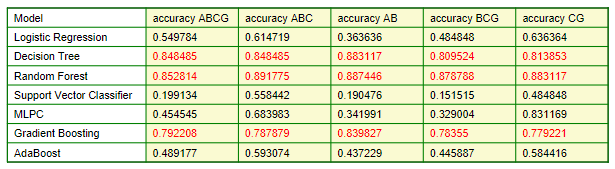